# Задание **Ultra pro**

Самостоятельно ознакомится с тем как работает механизм репликации данных в файловое
системе HDFS, описать процесс по шагам, нарисовать схему. 


Данная работа находится в гугл документах по ссылке:
https://docs.google.com/document/d/1Fb4rtlQSWOVXoo0_wxIsH2p-owEMAJksJBFFmOXwTBQ/edit?usp=sharing


  **Репликация данных в HDFS** – это процесс синхронизации содержимого нескольких копий файлового блока, когда его содержимое с одного DataNode копируется на другие узлы данных, чтобы предотвратить потерю данных в случае сбоя какого-либо хранилища.

  **По умолчанию все HDFS-блоки реплицируются 3 раза**, если клиентом (пользователем или приложением) не задано другое значение коэффициента репликации. С целью повышения надежности для хранения 2-ой и 3-ей реплики выбираются те узлы данных, которые расположены в разных серверных стойках. Последующие реплики могут храниться на любых серверах. Чтобы предотвратить потерю данных в случае сбоя кластера, следует настроить сервер имен так, чтобы он знал, на каких серверных стойках расположены узлы данных. Это делается с помощью специального механизма Hadoop — **rack awareness**

  Важно отметить, что **в HDFS отсутствуют инструменты поддержки ссылочной целостности данных**, которые могут гарантировать идентичность реплик. А, поскольку репликация выполняется в асинхронном режиме, т.е. с задержкой, вопрос идентичности реплик остается открытым – по крайней мере, на время распространения копий. Проверка целостности данных находится в зоне ответственности клиента. При создании файла клиент рассчитывает контрольные суммы каждые 512 байт и сохраняет их на сервере имен.


**Репликация данных в HDFS** выполняется в следующих случаях:
1.	Создание нового файла (операция записи);
2.	Обнаружение сервером имен отказа одного из узлов данных – если NameNode не получает от **DataNode** heartbeat-сообщений, он запускает механизм репликации;
3.	Повреждение существующих реплик;
4.	Увеличение количества реплик, присущих каждому блоку


Репликация данных в HDFS

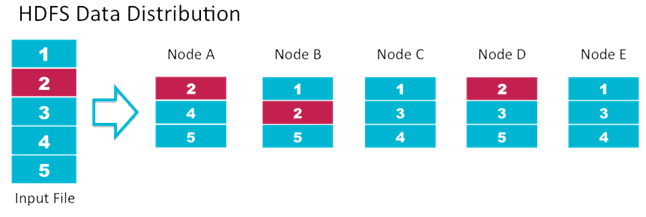

**Репликация данны**х выполняется следующим образом:
1.	NameNode выбирает новые узлов данных для размещения реплик;
2.	сервер имен выполняет балансировку размещения данных по узлам и составляет список узлов для репликации;
3.	1-я реплика размещается на первом узле из списка;
4.	2-я реплика копируется на другой узел в этой же серверной стойке;
5.	3-я реплика записывается на произвольный узел в другой серверной стойке;
6.	остальные реплики размещаются произвольным способом.


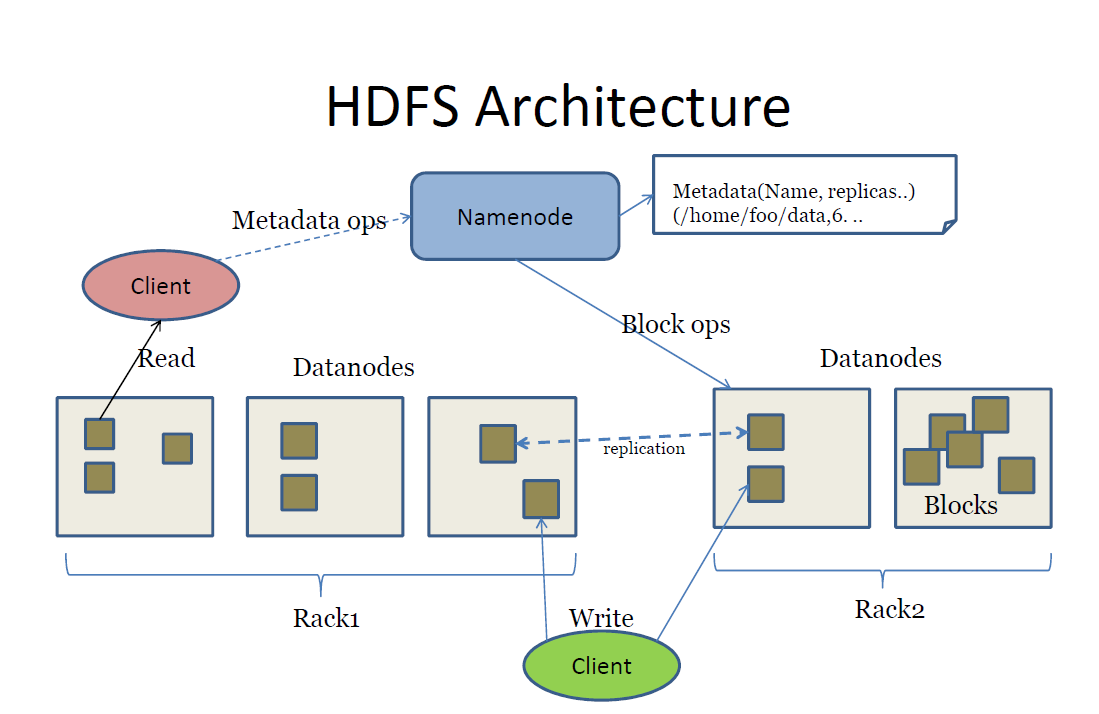

**Механизм репликации**:

При обнаружении NameNode-сервером отказа одного из DataNode-серверов (отсутствие heartbeat-сообщений от оного), запускается механизм репликации данных:

— выбор новых DataNode-серверов для новых реплик
— балансировка размещения данных по DataNode-серверам

Аналогичные действия производятся в случае повреждении реплик или в случае увеличения количества реплик присущих каждому блоку.



**Стратегия размещение реплик**:

Данные хранятся в виде последовательности блоков фиксированного размера. Копии блоков (реплики) хранятся на нескольких серверах, по умолчанию — трех. Их размещение происходит следующим образом:

— первая реплика размещается на локальном ноде
— вторая реплика на другой ноде в этой же стойке
— третья реплика на произвольной ноде другой стойки
— остальные реплики размещаются произвольным способом


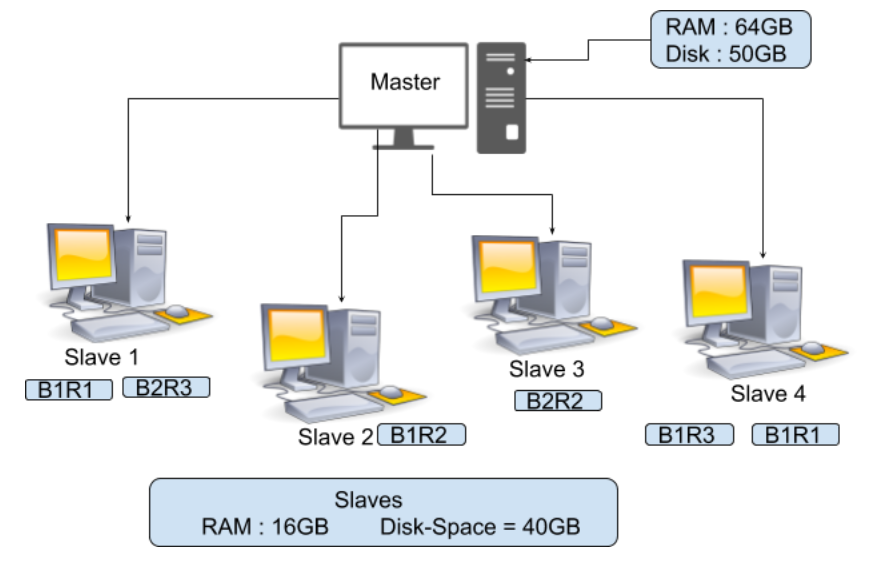